In [63]:
library(RPostgreSQL)
source("../aux/keys.R")

library(syuzhet)
library(tm)
library(RColorBrewer)
library(wordcloud)
library(twitteR)
library(topicmodels)
library(ggplot2)
library(dplyr)
library(reshape2)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:syuzhet’:

    rescale




In [7]:
# PostgreSQL
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

In [17]:
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text 
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 221")

In [19]:
df_postgres <- dbGetQuery(con, cmd)
# salvando RDS
saveRDS(df_postgres, "data/corona.rds")

In [35]:
str(df_postgres)

'data.frame':	794387 obs. of  2 variables:
 $ created: chr  "2020-02-11 20:09:09 UTC" "2020-02-11 20:14:41 UTC" "2020-02-12 14:01:12 UTC" "2020-02-12 14:01:42 UTC" ...
 $ text   : chr  "Na coletiva, Ministério da Saúde também atualizou os números do coronavírus no Brasil: oito casos suspeitos em "| __truncated__ "📰 #F5 - Jornal dos Canyons \n\n🇧🇷 🦠 Caiado diz que todos os 58 brasileiros em quarentena em Anápolis tiveram re"| __truncated__ "@Infinito262 Pois é.\nMas que o coronavirus é uma bela de uma fake é.\nMão estou dizendo que não existe, mas nã"| __truncated__ "Pois é.\nMas que o coronavirus é uma bela de uma fake é.\nMão estou dizendo que não existe, mas não é nada do q"| __truncated__ ...


In [ ]:
# amostra 1000 tweets
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text 
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 221 limit 1000")
df_1k <- dbGetQuery(con, cmd)

# salvando RDS
saveRDS(df_1k, "data/corona1k.rds")

# Tweets por dia

In [36]:
twsDia <- dbGetQuery(con, paste("SELECT " ,
                          "t.datatweet, " ,
                          "count(t.codtweet) AS tweet ",
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 221 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [37]:
twsDia

,datatweet,tweet
,<date>,<dbl>
1,2020-02-11,1361
2,2020-02-12,3685
3,2020-02-13,4463
4,2020-02-14,3148
5,2020-02-15,2927
6,2020-02-16,3449
7,2020-02-17,4637
8,2020-02-18,4179
9,2020-02-19,3161


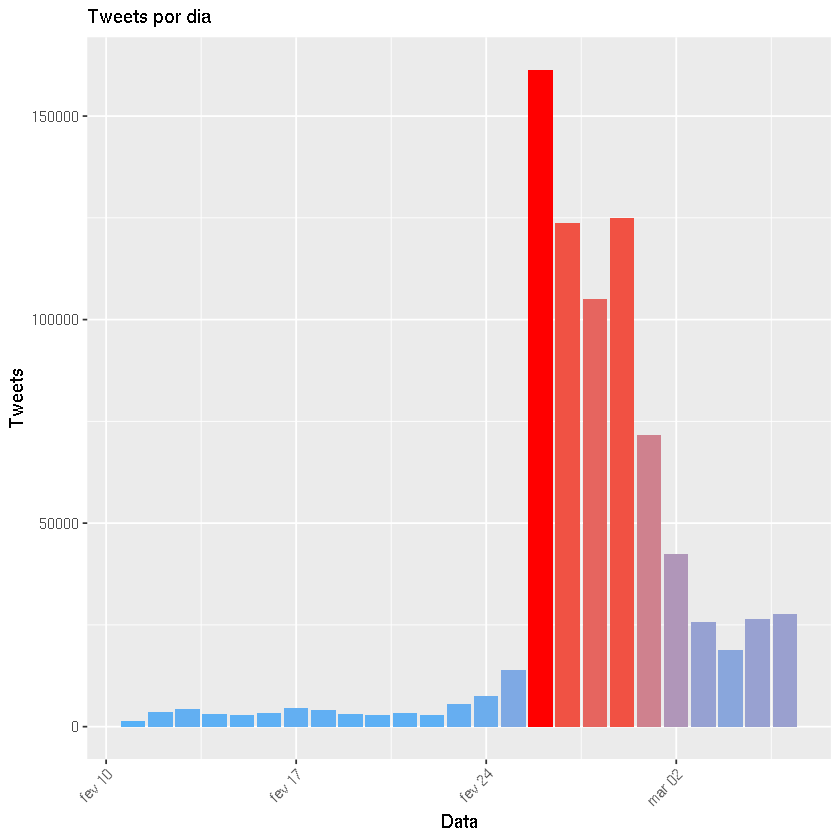

In [38]:
ggplot(data = twsDia, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por dia")

# Sentimentos Total

In [ ]:
sentiments <-(df_postgres$text, language="portuguese")

In [43]:
sentiments

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,1,0,0,1,1,0,3,1,3
0,0,0,0,0,1,0,2,1,1
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,2
0,0,0,0,0,0,0,0,0,0
6,0,1,3,1,2,1,3,7,7
1,1,0,1,1,0,1,1,1,2


In [44]:
tweets <- cbind(df_postgres$text, sentiments)
sentimentTotals <- data.frame(colSums(tweets[,c(2:9)]))
sentimentTotals
names(sentimentTotals) <- "count"
sentimentTotals <- cbind("sentiment" = rownames(sentimentTotals), sentimentTotals)
rownames(sentimentTotals) <- NULL

,colSums.tweets...c.2.9...
,<dbl>
anger,158803
anticipation,166985
disgust,125652
fear,359324
joy,107862
sadness,341006
surprise,99072
trust,281799


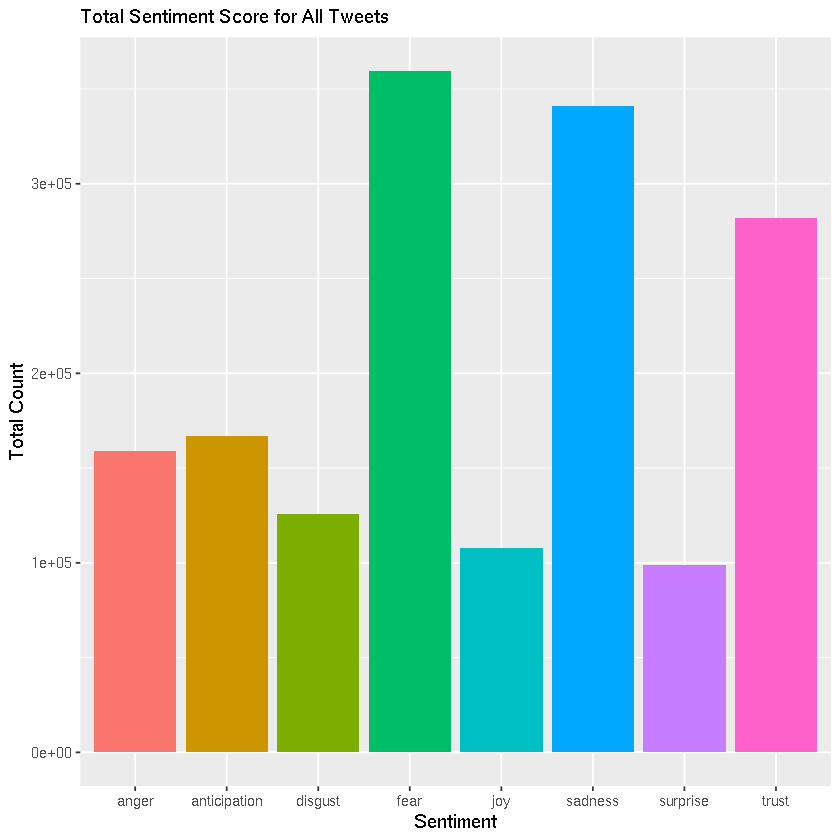

In [45]:
ggplot(data = sentimentTotals, aes(x = sentiment, y = count)) +
  geom_bar(aes(fill = sentiment), stat = "identity") +
  theme(legend.position = "none") +
  xlab("Sentiment") + ylab("Total Count") + ggtitle("Total Sentiment Score for All Tweets")

In [54]:
str(df_postgres)

'data.frame':	794387 obs. of  2 variables:
 $ created: chr  "2020-02-11 20:09:09 UTC" "2020-02-11 20:14:41 UTC" "2020-02-12 14:01:12 UTC" "2020-02-12 14:01:42 UTC" ...
 $ text   : chr  "Na coletiva, Ministério da Saúde também atualizou os números do coronavírus no Brasil: oito casos suspeitos em "| __truncated__ "📰 #F5 - Jornal dos Canyons \n\n🇧🇷 🦠 Caiado diz que todos os 58 brasileiros em quarentena em Anápolis tiveram re"| __truncated__ "@Infinito262 Pois é.\nMas que o coronavirus é uma bela de uma fake é.\nMão estou dizendo que não existe, mas nã"| __truncated__ "Pois é.\nMas que o coronavirus é uma bela de uma fake é.\nMão estou dizendo que não existe, mas não é nada do q"| __truncated__ ...


In [53]:
str(tweets)

'data.frame':	794387 obs. of  11 variables:
 $ df_postgres$text: Factor w/ 244315 levels "⁣\n🔸Não compartilhar objetos de uso pessoal, como talheres, pratos, copos ou garrafas;⁣\n⁣\n🔸Manter os ambientes b"| __truncated__,..: 131340 26398 11460 157124 44762 94164 164389 74856 108211 168201 ...
 $ anger           : num  0 0 0 0 0 0 0 6 1 0 ...
 $ anticipation    : num  0 0 1 0 0 0 0 0 1 0 ...
 $ disgust         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ fear            : num  0 1 0 0 0 0 0 3 1 0 ...
 $ joy             : num  0 0 1 0 0 0 0 1 1 0 ...
 $ sadness         : num  0 0 1 1 0 0 0 2 0 0 ...
 $ surprise        : num  0 0 0 0 0 0 0 1 1 0 ...
 $ trust           : num  0 0 3 2 0 1 0 3 1 0 ...
 $ negative        : num  0 0 1 1 0 0 0 7 1 0 ...
 $ positive        : num  0 0 3 1 0 2 0 7 2 0 ...


In [55]:
tweetsData <- cbind(df_postgres$created, sentiments)

In [57]:
str(tweetsData)

'data.frame':	794387 obs. of  11 variables:
 $ df_postgres$created: Factor w/ 457162 levels "2020-02-11 19:42:00 UTC",..: 179 208 3046 3047 3081 3082 3086 3087 3074 3133 ...
 $ anger              : num  0 0 0 0 0 0 0 6 1 0 ...
 $ anticipation       : num  0 0 1 0 0 0 0 0 1 0 ...
 $ disgust            : num  0 0 0 0 0 0 0 1 0 0 ...
 $ fear               : num  0 1 0 0 0 0 0 3 1 0 ...
 $ joy                : num  0 0 1 0 0 0 0 1 1 0 ...
 $ sadness            : num  0 0 1 1 0 0 0 2 0 0 ...
 $ surprise           : num  0 0 0 0 0 0 0 1 1 0 ...
 $ trust              : num  0 0 3 2 0 1 0 3 1 0 ...
 $ negative           : num  0 0 1 1 0 0 0 7 1 0 ...
 $ positive           : num  0 0 3 1 0 2 0 7 2 0 ...


In [60]:
posnegtime <- tweetsData %>% 
  group_by(df_postgres$created) %>% 
  summarise(anger = mean(anger), anticipation = mean(anticipation), disgust = mean(disgust),
            fear = mean(fear), joy = mean(joy), sadness = mean(sadness), surprise = mean(surprise),
            trust = mean(trust)) %>% 
  melt
names(posnegtime) <- c("date", "sentiment", "meanvalue")
posnegtime$sentiment = factor(posnegtime$sentiment,levels(posnegtime$sentiment)[c(8,7,6,5,4,3,2,1)])
posnegtime$sentiment

Using df_postgres$created as id variables



[1] anger anger anger anger anger anger anger anger anger anger anger anger
   [13] anger anger anger anger anger anger anger anger anger anger anger anger
   [25] anger anger anger anger anger anger anger anger anger anger anger anger
   [37] anger anger anger anger anger anger anger anger anger anger anger anger
   [49] anger anger anger anger anger anger anger anger anger anger anger anger
   [61] anger anger anger anger anger anger anger anger anger anger anger anger
   [73] anger anger anger anger anger anger anger anger anger anger anger anger
   [85] anger anger anger anger anger anger anger anger anger anger anger anger
   [97] anger anger anger anger anger anger anger anger anger anger anger anger
  [109] anger anger anger anger anger anger anger anger anger anger anger anger
  [121] anger anger anger anger anger anger anger anger anger anger anger anger
  [133] anger anger anger anger anger anger anger anger anger anger anger anger
  [145] anger anger anger anger anger anger anger anger anger anger anger anger
  [157] anger anger anger anger anger anger anger anger anger anger anger anger
  [169] anger anger anger anger anger anger anger anger anger anger anger anger
  [181] anger anger anger anger anger anger anger anger anger anger anger anger
  [193] anger anger anger anger anger anger anger anger anger anger anger anger
  [205] anger anger anger anger anger anger anger anger anger anger anger anger
  [217] anger anger anger anger anger anger anger anger anger anger anger anger
  [229] anger anger anger anger anger anger anger anger anger anger anger anger
  [241] anger anger anger anger anger anger anger anger anger anger anger anger
  [253] anger anger anger anger anger anger anger anger anger anger anger anger
  [265] anger anger anger anger anger anger anger anger anger anger anger anger
  [277] anger anger anger anger anger anger anger anger anger anger anger anger
  [289] anger anger anger anger anger anger anger anger anger anger anger anger
  [301] anger anger anger anger anger anger anger anger anger anger anger anger
  [313] anger anger anger anger anger anger anger anger anger anger anger anger
  [325] anger anger anger anger anger anger anger anger anger anger anger anger
  [337] anger anger anger anger anger anger anger anger anger anger anger anger
  [349] anger anger anger anger anger anger anger anger anger anger anger anger
  [361] anger anger anger anger anger anger anger anger anger anger anger anger
  [373] anger anger anger anger anger anger anger anger anger anger anger anger
  [385] anger anger anger anger anger anger anger anger anger anger anger anger
  [397] anger anger anger anger anger anger anger anger anger anger anger anger
  [409] anger anger anger anger anger anger anger anger anger anger anger anger
  [421] anger anger anger anger anger anger anger anger anger anger anger anger
  [433] anger anger anger anger anger anger anger anger anger anger anger anger
  [445] anger anger anger anger anger anger anger anger anger anger anger anger
  [457] anger anger anger anger anger anger anger anger anger anger anger anger
  [469] anger anger anger anger anger anger anger anger anger anger anger anger
  [481] anger anger anger anger anger anger anger anger anger anger anger anger
  [493] anger anger anger anger anger anger anger anger anger anger anger anger
  [505] anger anger anger anger anger anger anger anger anger anger anger anger
  [517] anger anger anger anger anger anger anger anger anger anger anger anger
  [529] anger anger anger anger anger anger anger anger anger anger anger anger
  [541] anger anger anger anger anger anger anger anger anger anger anger anger
  [553] anger anger anger anger anger anger anger anger anger anger anger anger
  [565] anger anger anger anger anger anger anger anger anger anger anger anger
  [577] anger anger anger anger anger anger anger anger anger anger anger anger
  [589] anger anger anger anger anger anger anger anger anger anger anger anger
  [6

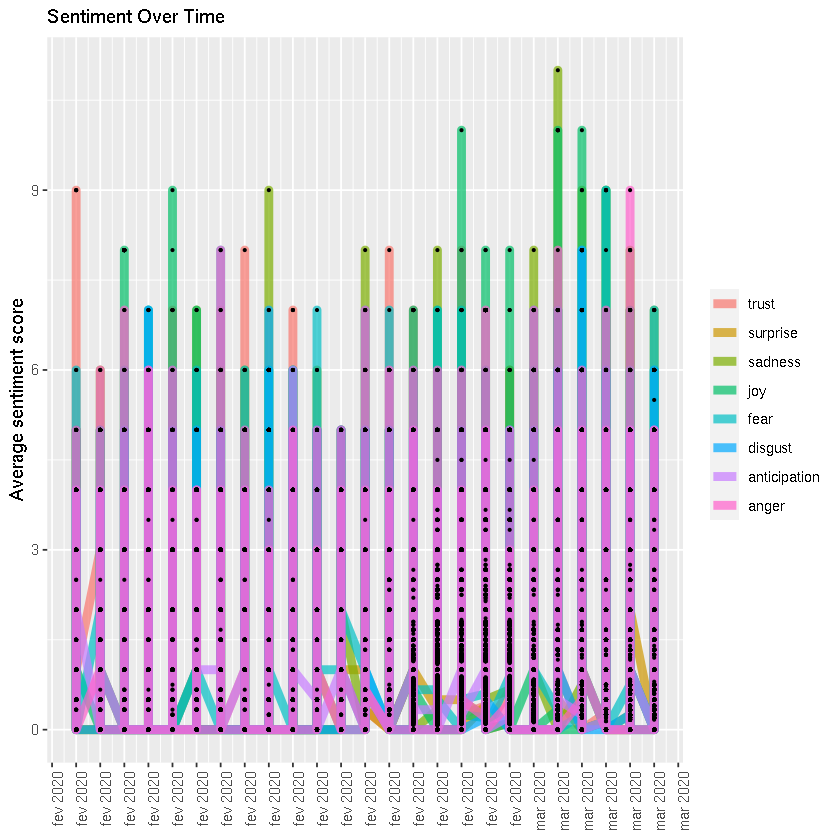

In [64]:
ggplot(data = posnegtime, aes(x = as.Date(date), y = meanvalue, group = sentiment)) +
  geom_line(size = 2.5, alpha = 0.7, aes(color = sentiment)) +
  geom_point(size = 0.5) +
  ylim(0, NA) + 
  #scale_colour_manual(values = c("springgreen4", "firebrick3", "blue", "red")) +
  theme(legend.title=element_blank(), axis.title.x = element_blank()) +
  scale_x_date(breaks = date_breaks("1 day"), labels = date_format("%b %Y")) +
  ylab("Average sentiment score") +
  theme(axis.text.x=element_text(angle=90,hjust=1)) +
  ggtitle("Sentiment Over Time")



In [ ]:
sentAnger <- tweetsData %>% 
  group_by(df_postgres$created) %>% 
  summarise(anger = mean(anger)) %>% 
  melt
names(sentAnger) <- c("date", "sentiment", "meanvalue")
sentAnger$sentiment = factor(posnegtime$sentiment,levels(posnegtime$sentiment)[c(1)])
sentAnger$sentiment

Using df_postgres$created as id variables



In [ ]:
ggplot(data = sentAnger, aes(x = as.Date(date), y = meanvalue, group = sentiment)) +
  geom_line(size = 2.5, alpha = 0.7, aes(color = sentiment)) +
  geom_point(size = 0.5) +
  ylim(0, NA) + 
  #scale_colour_manual(values = c("springgreen4", "firebrick3", "blue", "red")) +
  theme(legend.title=element_blank(), axis.title.x = element_blank()) +
  scale_x_date(breaks = date_breaks("1 day"), labels = date_format("%b %Y")) +
  ylab("Average sentiment score") +a
  theme(axis.text.x=element_text(angle=90,hjust=1)) +
  ggtitle("Anger Over Time")

In [24]:
mytext = df_1k$text

In [27]:
sentiments <- get_nrc_sentiment(mytext, language="portuguese")

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [28]:
sentiments

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,1,0,3
0,0,0,1,0,0,0,2,2,1
0,0,0,0,0,0,0,0,0,1
0,1,0,0,1,0,0,1,0,1
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,1,0
5,1,2,4,2,1,1,2,3,2
0,0,0,0,0,0,0,0,0,0


In [30]:
tweets <- cbind(mytext, sentiments)

In [31]:


sentimentTotals <- data.frame(colSums(tweets[,c(2:9)]))
sentimentTotals

names(sentimentTotals) <- "count"
sentimentTotals <- cbind("sentiment" = rownames(sentimentTotals), sentimentTotals)
rownames(sentimentTotals) <- NULL


,colSums.tweets...c.2.9...
,<dbl>
anger,199
anticipation,199
disgust,123
fear,385
joy,71
sadness,282
surprise,135
trust,371


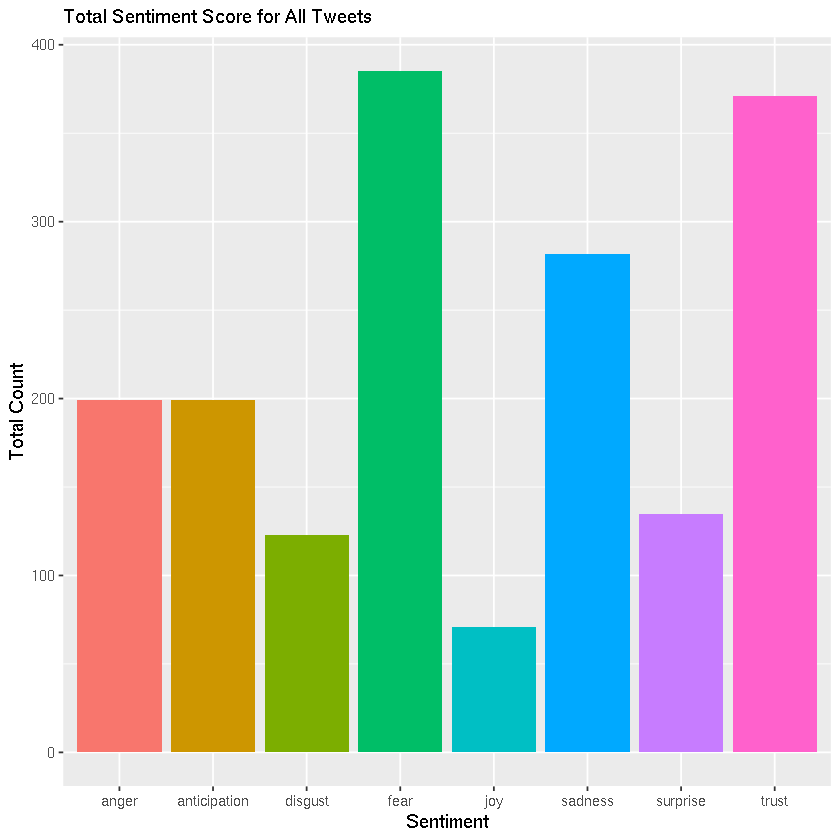

In [34]:
ggplot(data = sentimentTotals, aes(x = sentiment, y = count)) +
  geom_bar(aes(fill = sentiment), stat = "identity") +
  theme(legend.position = "none") +
  xlab("Sentiment") + ylab("Total Count") + ggtitle("Total Sentiment Score for All Tweets")

